In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.api.types import is_numeric_dtype

In [74]:
df = pd.read_table('USCensus1990.data.txt', sep=',')

In [69]:
df

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458280,2468280,7,1,2,0,0,0,0,2,2,...,3,0,0,0,2,2,1,7,5,1
2458281,2468281,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
2458282,2468282,3,3,1,0,0,1,2,2,2,...,0,5,0,2,1,1,0,11,1,0
2458283,2468283,6,0,1,0,0,1,3,2,2,...,0,1,0,2,1,1,0,10,1,0


In [75]:
#usuwanie pierwszej kolumny, gdyz zgodnie z intrukcja jest ona zbedna
df = df.iloc[:, 1:]

In [6]:
df

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,5,0,1,0,0,5,3,2,2,1,...,0,5,0,2,1,1,0,11,1,0
1,6,1,1,0,0,7,5,2,2,0,...,0,1,0,2,1,1,0,5,1,0
2,3,1,2,0,0,7,4,2,2,0,...,0,2,0,2,1,1,0,10,1,0
3,4,1,2,0,0,1,3,2,2,0,...,0,1,0,1,1,1,0,10,1,0
4,7,1,1,0,0,0,0,2,2,0,...,3,0,0,0,2,2,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458280,7,1,2,0,0,0,0,2,2,0,...,3,0,0,0,2,2,1,7,5,1
2458281,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
2458282,3,3,1,0,0,1,2,2,2,1,...,0,5,0,2,1,1,0,11,1,0
2458283,6,0,1,0,0,1,3,2,2,0,...,0,1,0,2,1,1,0,10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 68 columns):
 #   Column     Dtype
---  ------     -----
 0   dAge       int64
 1   dAncstry1  int64
 2   dAncstry2  int64
 3   iAvail     int64
 4   iCitizen   int64
 5   iClass     int64
 6   dDepart    int64
 7   iDisabl1   int64
 8   iDisabl2   int64
 9   iEnglish   int64
 10  iFeb55     int64
 11  iFertil    int64
 12  dHispanic  int64
 13  dHour89    int64
 14  dHours     int64
 15  iImmigr    int64
 16  dIncome1   int64
 17  dIncome2   int64
 18  dIncome3   int64
 19  dIncome4   int64
 20  dIncome5   int64
 21  dIncome6   int64
 22  dIncome7   int64
 23  dIncome8   int64
 24  dIndustry  int64
 25  iKorean    int64
 26  iLang1     int64
 27  iLooking   int64
 28  iMarital   int64
 29  iMay75880  int64
 30  iMeans     int64
 31  iMilitary  int64
 32  iMobility  int64
 33  iMobillim  int64
 34  dOccup     int64
 35  iOthrserv  int64
 36  iPerscare  int64
 37  dPOB       int64
 38  dP

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dAge,2458285.0,3.851643,2.048492,0.0,2.0,4.0,6.0,7.0
dAncstry1,2458285.0,3.299006,4.041179,0.0,1.0,1.0,3.0,11.0
dAncstry2,2458285.0,1.574252,1.696150,1.0,1.0,1.0,2.0,12.0
iAvail,2458285.0,0.120749,0.670958,0.0,0.0,0.0,0.0,4.0
iCitizen,2458285.0,0.288096,0.966712,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
iWorklwk,2458285.0,1.095047,0.743709,0.0,1.0,1.0,2.0,2.0
iWWII,2458285.0,0.038445,0.192268,0.0,0.0,0.0,0.0,1.0
iYearsch,2458285.0,8.446546,4.080579,0.0,5.0,10.0,11.0,17.0
iYearwrk,2458285.0,1.820591,2.108889,0.0,1.0,1.0,2.0,7.0


Czy są jakieś braki danych?

In [9]:
df.isna().mean(axis=0).any()

False

In [13]:
cols = df.columns
(df[list(cols)] == 0).sum(axis = 0)


dAge           32169
dAncstry1     232481
dAncstry2          0
iAvail       2379020
iCitizen     2244738
              ...   
iWorklwk      574120
iWWII        2363776
iYearsch      109834
iYearwrk      574495
dYrsserv     2168997
Length: 68, dtype: int64

# Rozkłady naszych zmiennych

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D827BC640>,
      dtype=object)

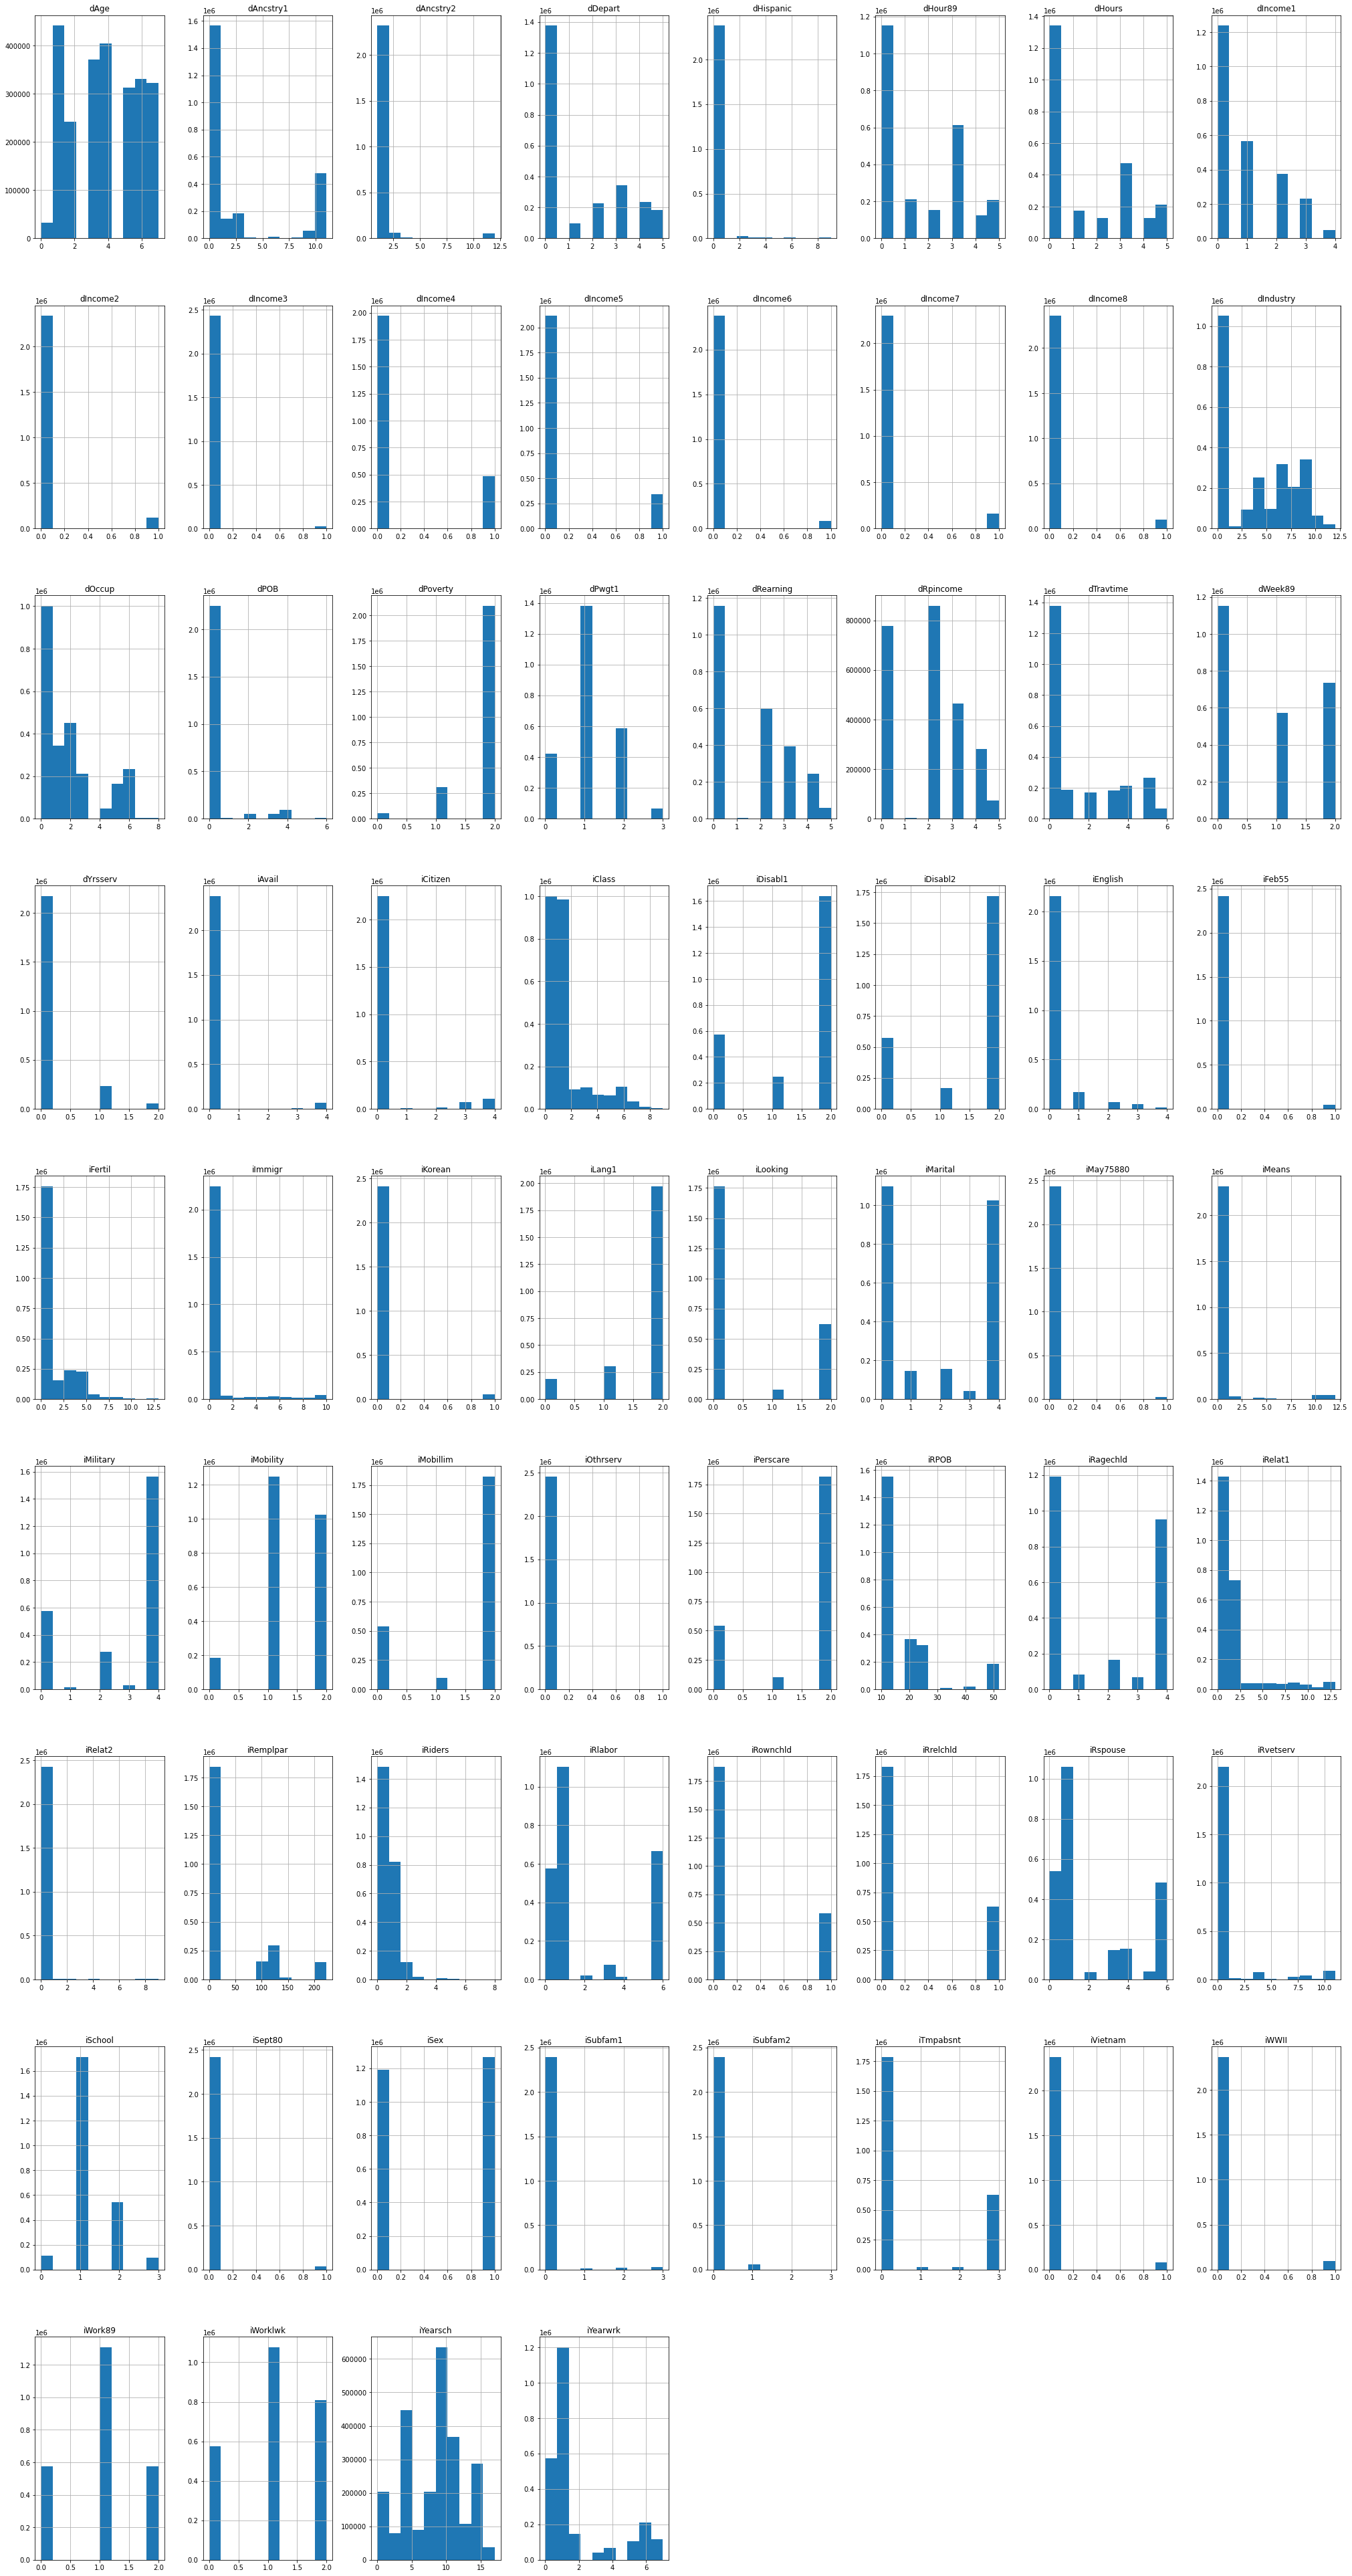

In [19]:
df.hist(figsize=(35, 70))

# Mapa korelacji pomiędzy naszymi zmiennymi

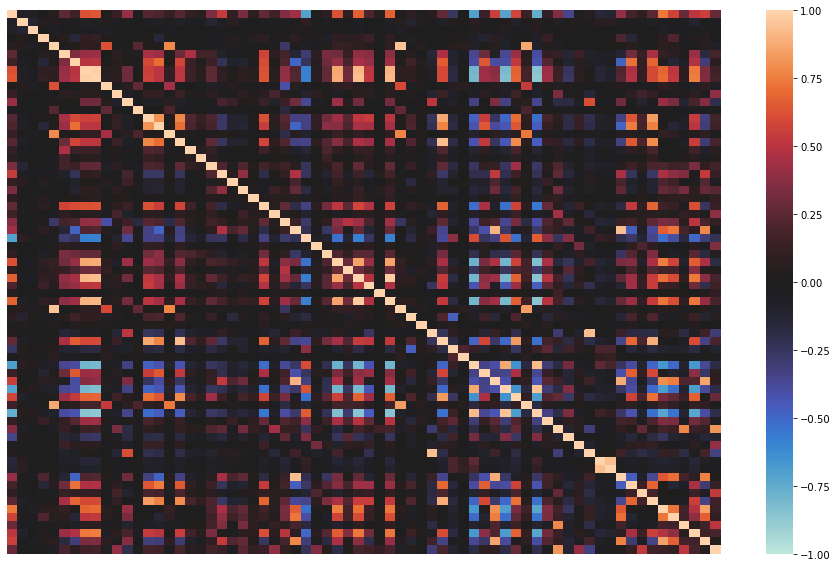

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='icefire', xticklabels=False, yticklabels=False)

# Usunięcie outlierów 

# Preprocessing

In [107]:
def outlier_clumper(df):
    min_quantile = 0.025
    max_quantile = 0.975
    min_max_dict = {}
    min_q = min_quantile
    max_q = max_quantile
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            continue
        min_max_dict[column] = (df[column].quantile(min_q), df[column].quantile(max_q))
    df_copy = df.copy()
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            continue
        min_v = min_max_dict[column][0]
        max_v = min_max_dict[column][1]
        df_copy.loc[df[column] < min_v, column] = min_v
        df_copy.loc[df[column] > max_v, column] = max_v
    return df_copy
    

In [108]:
df = outlier_clumper(df)

#### Standard Scaler

In [76]:
def standard_scale(df):
    features = list(df.columns)
    z_scored = StandardScaler()
    df[features] = z_scored.fit_transform(df[features])

In [79]:
standard_scale(df)

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dAge,2458285.0,8.902695e-15,1.0,-1.880234,-0.903906,0.072423,1.048751,1.536915
dAncstry1,2458285.0,3.359642e-15,1.0,-0.816348,-0.568895,-0.568895,-0.073990,1.905631
dAncstry2,2458285.0,1.707195e-14,1.0,-0.338562,-0.338562,-0.338562,0.251008,6.146715
iAvail,2458285.0,-4.329962e-15,1.0,-0.179965,-0.179965,-0.179965,-0.179965,5.781664
iCitizen,2458285.0,-5.606521e-15,1.0,-0.298017,-0.298017,-0.298017,-0.298017,3.839722
...,...,...,...,...,...,...,...,...
iWorklwk,2458285.0,-2.585666e-15,1.0,-1.472413,-0.127801,-0.127801,1.216811,1.216811
iWWII,2458285.0,1.740862e-14,1.0,-0.199956,-0.199956,-0.199956,-0.199956,5.001112
iYearsch,2458285.0,-1.068080e-15,1.0,-2.069938,-0.844622,0.380695,0.625758,2.096138
iYearwrk,2458285.0,-6.047969e-15,1.0,-0.863294,-0.389111,-0.389111,0.085073,2.455990


In [85]:
df.describe().columns.tolist()

['dAge',
 'dAncstry1',
 'dAncstry2',
 'iAvail',
 'iCitizen',
 'iClass',
 'dDepart',
 'iDisabl1',
 'iDisabl2',
 'iEnglish',
 'iFeb55',
 'iFertil',
 'dHispanic',
 'dHour89',
 'dHours',
 'iImmigr',
 'dIncome1',
 'dIncome2',
 'dIncome3',
 'dIncome4',
 'dIncome5',
 'dIncome6',
 'dIncome7',
 'dIncome8',
 'dIndustry',
 'iKorean',
 'iLang1',
 'iLooking',
 'iMarital',
 'iMay75880',
 'iMeans',
 'iMilitary',
 'iMobility',
 'iMobillim',
 'dOccup',
 'iOthrserv',
 'iPerscare',
 'dPOB',
 'dPoverty',
 'dPwgt1',
 'iRagechld',
 'dRearning',
 'iRelat1',
 'iRelat2',
 'iRemplpar',
 'iRiders',
 'iRlabor',
 'iRownchld',
 'dRpincome',
 'iRPOB',
 'iRrelchld',
 'iRspouse',
 'iRvetserv',
 'iSchool',
 'iSept80',
 'iSex',
 'iSubfam1',
 'iSubfam2',
 'iTmpabsnt',
 'dTravtime',
 'iVietnam',
 'dWeek89',
 'iWork89',
 'iWorklwk',
 'iWWII',
 'iYearsch',
 'iYearwrk',
 'dYrsserv']

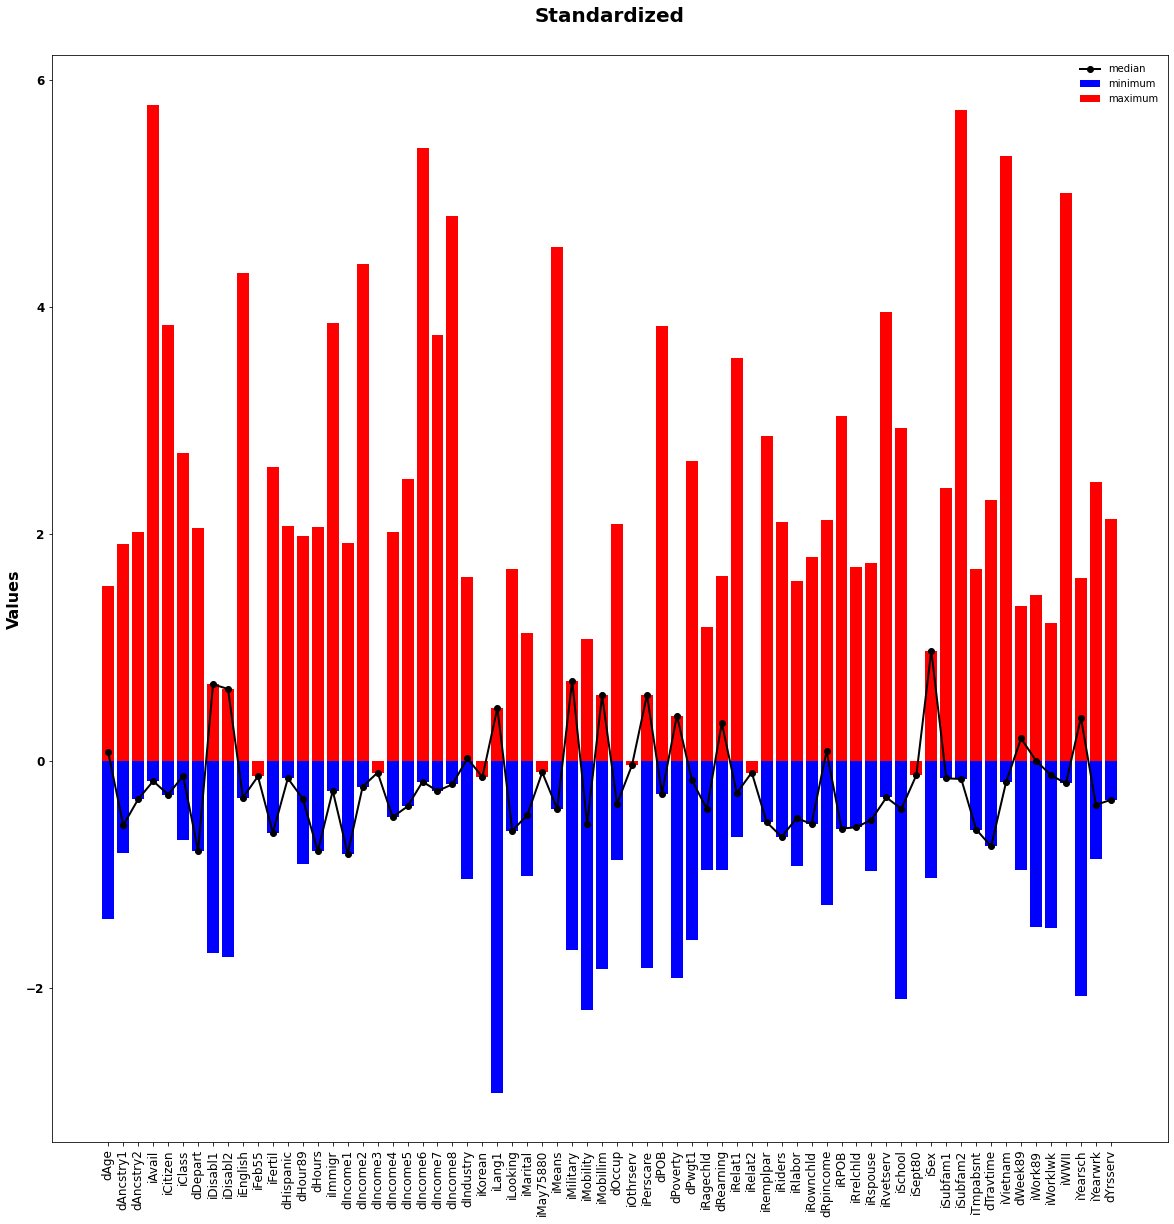

In [109]:
# Graph min, median & max values of each feature after they've been feature engineered
fig, ax = plt.subplots(figsize=(20, 20))
plt.plot(df.describe().columns.tolist(), df.describe().iloc[5,:], label="median", color="black", linewidth=2, marker="o")
plt.bar(df.describe().columns.tolist(), df.describe().iloc[3,:], label="minimum", color = 'blue')
plt.bar(df.describe().columns.tolist(), df.describe().iloc[-1,:], label="maximum", color = 'red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Values", fontsize=16, fontweight="bold")
plt.title("Standardized", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.legend(loc="best", frameon=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

# PCA

In [110]:
df_array = df.values
df_array

array([[ 0.56058677, -0.81634759, -0.33856234, ...,  0.62575789,
        -0.38911057, -0.34492804],
       [ 1.04875093, -0.56889503, -0.33856234, ..., -0.84462189,
        -0.38911057, -0.34492804],
       [-0.41574155, -0.56889503,  0.2510083 , ...,  0.38069459,
        -0.38911057, -0.34492804],
       ...,
       [-0.41574155, -0.07398991, -0.33856234, ...,  0.62575789,
        -0.38911057, -0.34492804],
       [ 1.04875093, -0.81634759, -0.33856234, ...,  0.38069459,
        -0.38911057, -0.34492804],
       [-0.9039057 , -0.07398991, -0.33856234, ..., -0.84462189,
        -0.86329401, -0.34492804]])

In [88]:
pca = PCA(random_state=42)
pca.fit(df_array)

PCA(random_state=42)

In [90]:
df_pca = pd.DataFrame({
    "principal_component": range(1, df_array.shape[1]+1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumsum_explained_variance": pca.explained_variance_ratio_.cumsum(),
})
df_pca.loc[-1] = 0
df_pca.sort_values(by="principal_component", inplace=True)

In [91]:
df_pca

,principal_component,explained_variance,cumsum_explained_variance
-1,0,0.000000,0.000000
0,1,0.222448,0.222448
1,2,0.125688,0.348136
2,3,0.064625,0.412761
3,4,0.054623,0.467384
...,...,...,...
63,64,0.000383,0.999149
64,65,0.000280,0.999429
65,66,0.000221,0.999650
66,67,0.000189,0.999839


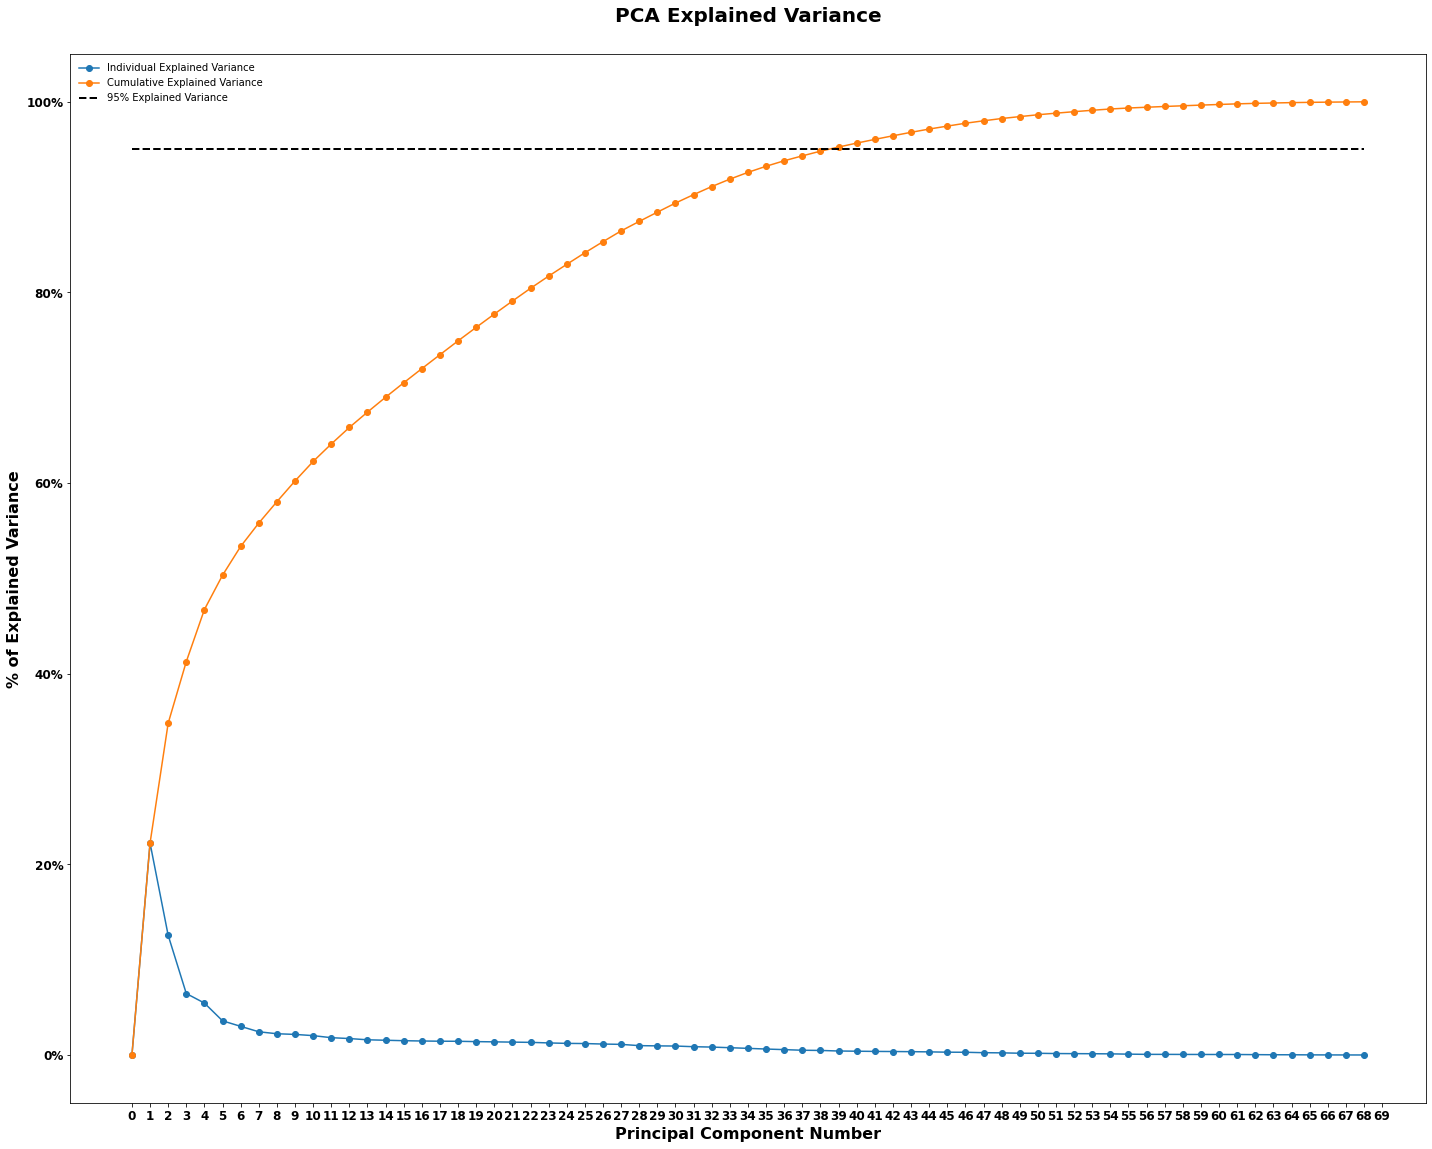

In [95]:
fig, ax = plt.subplots(figsize=(20, 16))
plt.plot(df_pca["principal_component"], df_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(df_pca["principal_component"], df_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(df_pca["principal_component"], [0.95] * len(df_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0,70), range(0,70), fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()
plt.show()

In [96]:
n_components_pca = int(df_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 38


In [98]:
pca = PCA(n_components=n_components_pca, random_state=42)
df_array = pca.fit_transform(df_array)